In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Importing data set

In [2]:
df=pd.read_csv('loan_prediction.csv')

In [3]:
df.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


it is a classification problem. what to predict predict loan_status yes or no

In [4]:
df.shape

(614, 13)

In [5]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

we have both numerical nd categorical columns

In [7]:
#checking null values
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

many columns have null values like gender,married,dependents,self employed,loan amount,loan_amount_term,credit_history

In [8]:
#seperating the numerical and categorical columns

#checking the Categorical columns
Categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] =="object": 
        Categorical_col.append(i)
 
print("Categorical columns:  ",Categorical_col)
print("\n")


Numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i] !="object": 
        Numerical_col.append(i)
 
print("Numerical columns:  ",Numerical_col)
print("\n")


Categorical columns:   ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


Numerical columns:   ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']




In [9]:
#dropping the unwanted columns
df.drop('Loan_ID',axis=1,inplace=True)

In [10]:
#Handling the missing values in Gender column by using mode method it is a categorical column
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [11]:
#Handling the missing values in Married column by using mode method it is a categorical column
df['Married'].fillna(df['Married'].mode()[0], inplace=True)

In [12]:
df['Dependents'].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [13]:
#Handling the missing values in Dependents column by using mode method '0' is repeated more times
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

In [14]:
df['Self_Employed'].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

In [15]:
#Handling the missing values in Self_Employed column by using mode method it is a categorical column
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

In [16]:
df['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

In [17]:
#Handling the missing values in Credit_History column by using mode method it is a categorical column
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [18]:
df['LoanAmount'].value_counts()

LoanAmount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

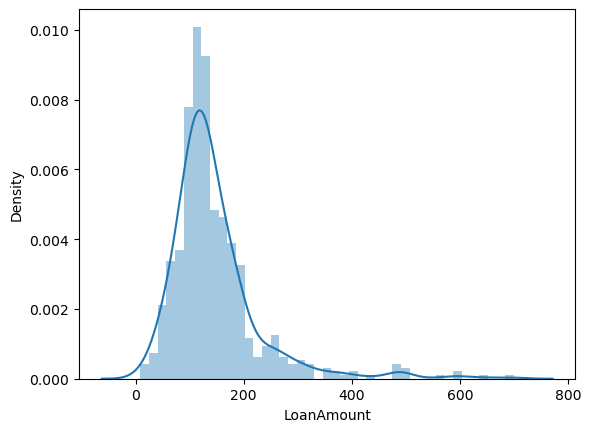

In [19]:
#replacing the missing values in "LoanAmount" 
ax=sns.distplot(df["LoanAmount"],color=None)
plt.show

In [20]:
df['LoanAmount'].median()

128.0

In [21]:
#Handling the missing values in LoanAmount column by using mode method it is a numerical column
df['LoanAmount'].fillna(df['LoanAmount'].mode()[0], inplace=True)

In [22]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [23]:
#Handling the missing values in Loan_Amount_Term column by using mode method it is a numerical column
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [24]:
#checking null values
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

all missing values are filled.. no missing values 

# EDA EXPLORATARY DATA ANALYS

In [25]:
#getting the stastical information about data for numerical columns
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.465798,342.410423,0.855049
std,6109.041673,2926.248369,84.180967,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,125.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


1)from above we have clearly seen that no missing values.
2)mean is greater than median in ApplicantIncome,CoapplicantIncome and LoanAmount data is positively skeweed.
3)mean is lesser than median in remaining columns negatively skeweed.
4)most of the columns have outliers the difference between 75% and max is high

Loan_Status
Y    422
N    192
Name: count, dtype: int64


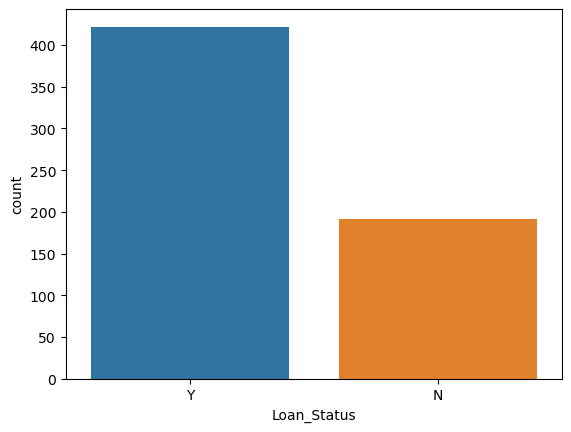

In [26]:
#checking no of unique values in target column
df['Loan_Status'].value_counts()
ax=sns.countplot(x="Loan_Status", data=df)
print(df['Loan_Status'].value_counts())

422-y and 192 -n its a imbalanced dataseet

<Axes: xlabel='Gender', ylabel='count'>

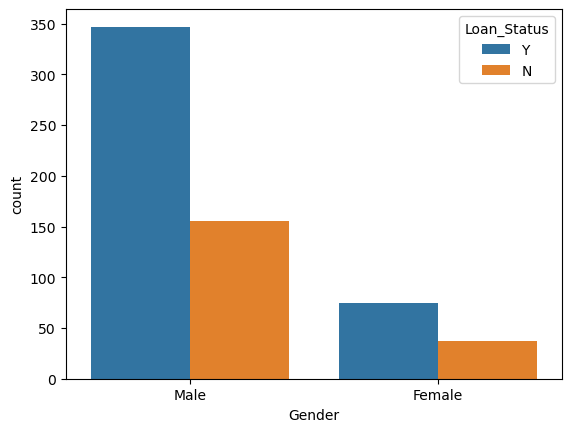

In [27]:
#comparing the no of people 'Gender with Loan_Status
sns.countplot(x='Gender', hue='Loan_Status', data=df)

loan_status is more in male when compared to female.

<Axes: xlabel='Married', ylabel='count'>

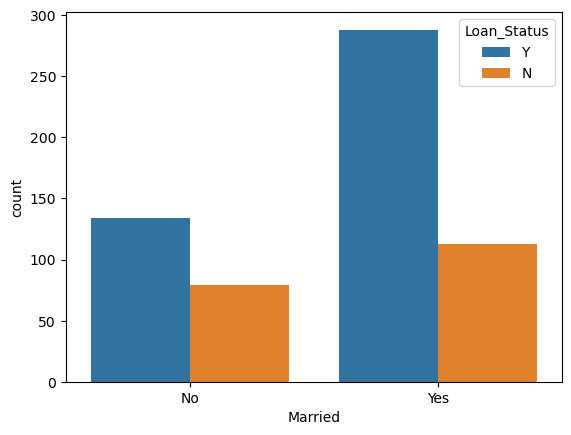

In [28]:
#comparing the no of people Married with Loan_Status
sns.countplot(x='Married', hue='Loan_Status', data=df)

married people has more y in loan_ status

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64


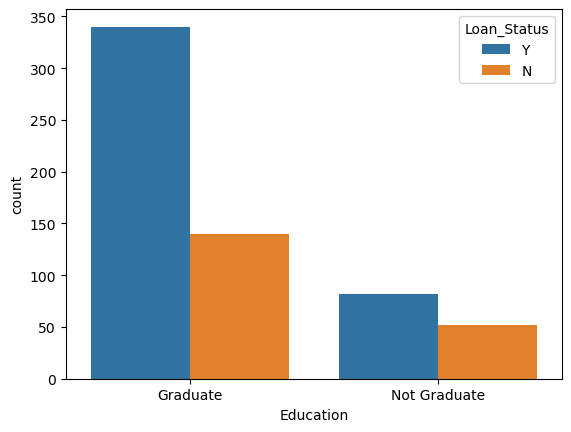

In [29]:
#comparing the no of people Education with Loan_Status
sns.countplot(x='Education', hue='Loan_Status', data=df)
print(df['Education'].value_counts())

Graduate people has more y in loan_status when comparec to non graduate

Dependents
0     360
1     102
2     101
3+     51
Name: count, dtype: int64


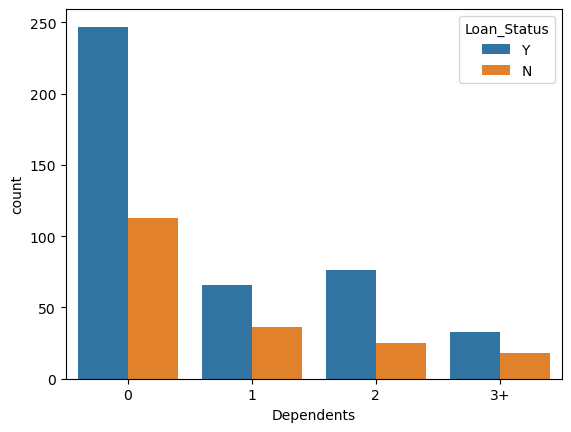

In [30]:
#comparing the no of people Dependents with Loan_Status
sns.countplot(x='Dependents', hue='Loan_Status', data=df)
print(df['Dependents'].value_counts())

dependent 360 has more y in loan_status

Self_Employed
No     532
Yes     82
Name: count, dtype: int64


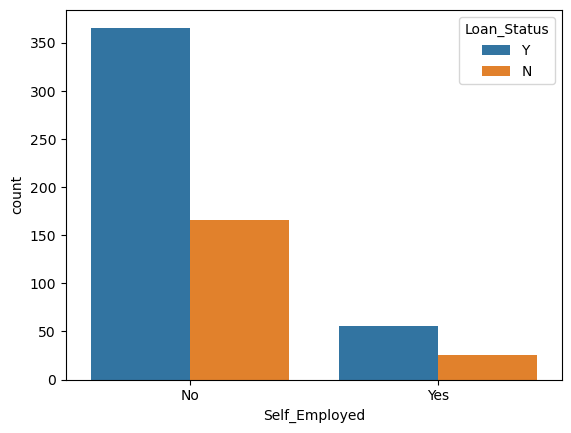

In [31]:
#comparing the no of people Self_Employed with Loan_Status
sns.countplot(x='Self_Employed', hue='Loan_Status', data=df)
print(df['Self_Employed'].value_counts())

self_employed no has more y in loan_status

Detecting outliers

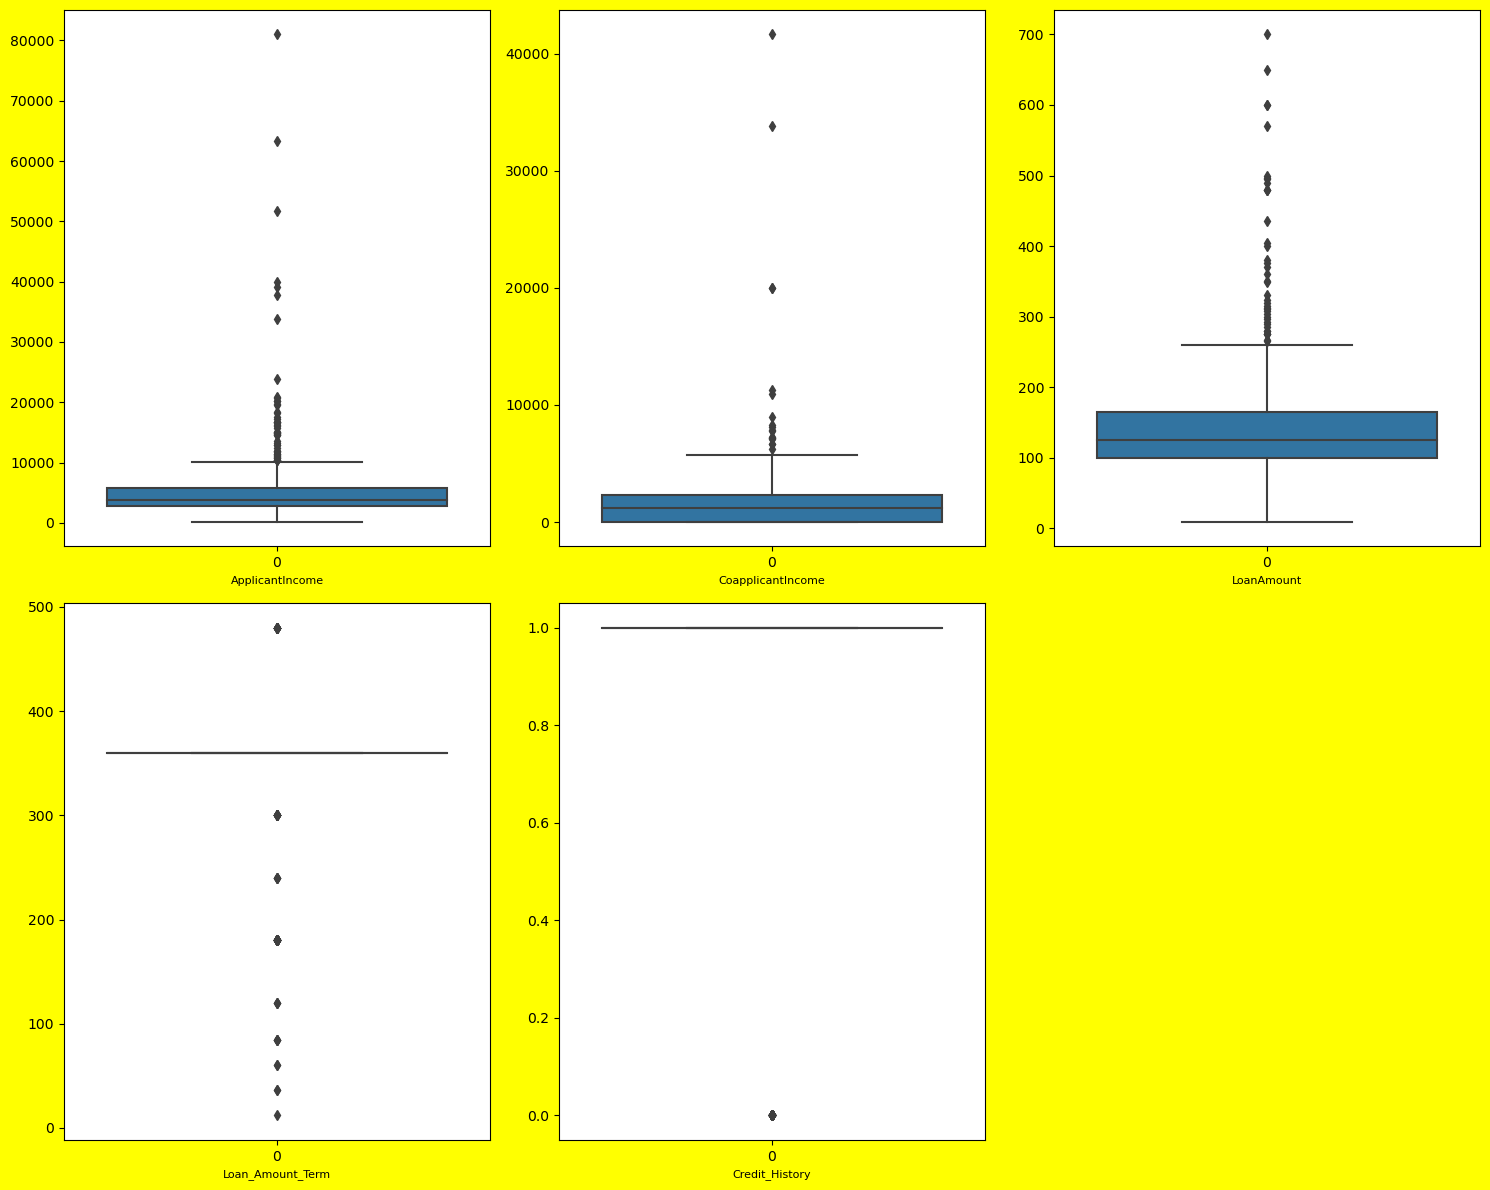

In [32]:
# visulizing the outliers by boxplot
plt.figure(figsize=(15,12), facecolor= "yellow")
plotnumber = 1
for col in Numerical_col:
    if plotnumber<=5:
        ax=plt.subplot(2,3, plotnumber)
        sns.boxplot(df[col])
        plt.xlabel(col,fontsize=8)
        plt.yticks(rotation= 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

there is alot of outliers in all columns

In [33]:
#REMOVING THE OUTLIERS DATA BY USING Z SCORE METHOD
from scipy.stats import zscore

z=np.abs(zscore(df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]))
z

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,0.072991,0.554487,0.302759,0.273231,0.411733
1,0.134412,0.038732,0.207648,0.273231,0.411733
2,0.393747,0.554487,0.944757,0.273231,0.411733
3,0.462062,0.251980,0.302759,0.273231,0.411733
4,0.097728,0.554487,0.053093,0.273231,0.411733
...,...,...,...,...,...
609,0.410130,0.554487,0.885313,0.273231,0.411733
610,0.212557,0.554487,1.253868,2.522836,0.411733
611,0.437174,0.472404,1.278459,0.273231,0.411733
612,0.357064,0.554487,0.493794,0.273231,0.411733


In [34]:
#threesold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
        183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
        432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
        600, 604], dtype=int64),
 array([1, 3, 3, 3, 0, 2, 3, 0, 2, 0, 2, 1, 2, 0, 0, 3, 3, 2, 2, 3, 0, 2,
        2, 1, 0, 1, 2, 0, 2, 3, 3, 2, 2, 2, 3, 2, 3, 1, 3, 1, 2],
       dtype=int64))

In [35]:
z.iloc[9,1]

3.196712546212882

In [36]:
#removoing the dataabove zscore and creating new df
df1=df[(z<3).all(axis=1)]
df1.shape

(577, 12)

In [37]:
#shape of old and new data
print("old data frame.--",df.shape[0])
print("new data frame.--",df1.shape[0])

old data frame.-- 614
new data frame.-- 577


In [38]:
print("data loss percentage--", ((df.shape[0]-df1.shape[0])/df.shape[0])*100)

data loss percentage-- 6.026058631921824


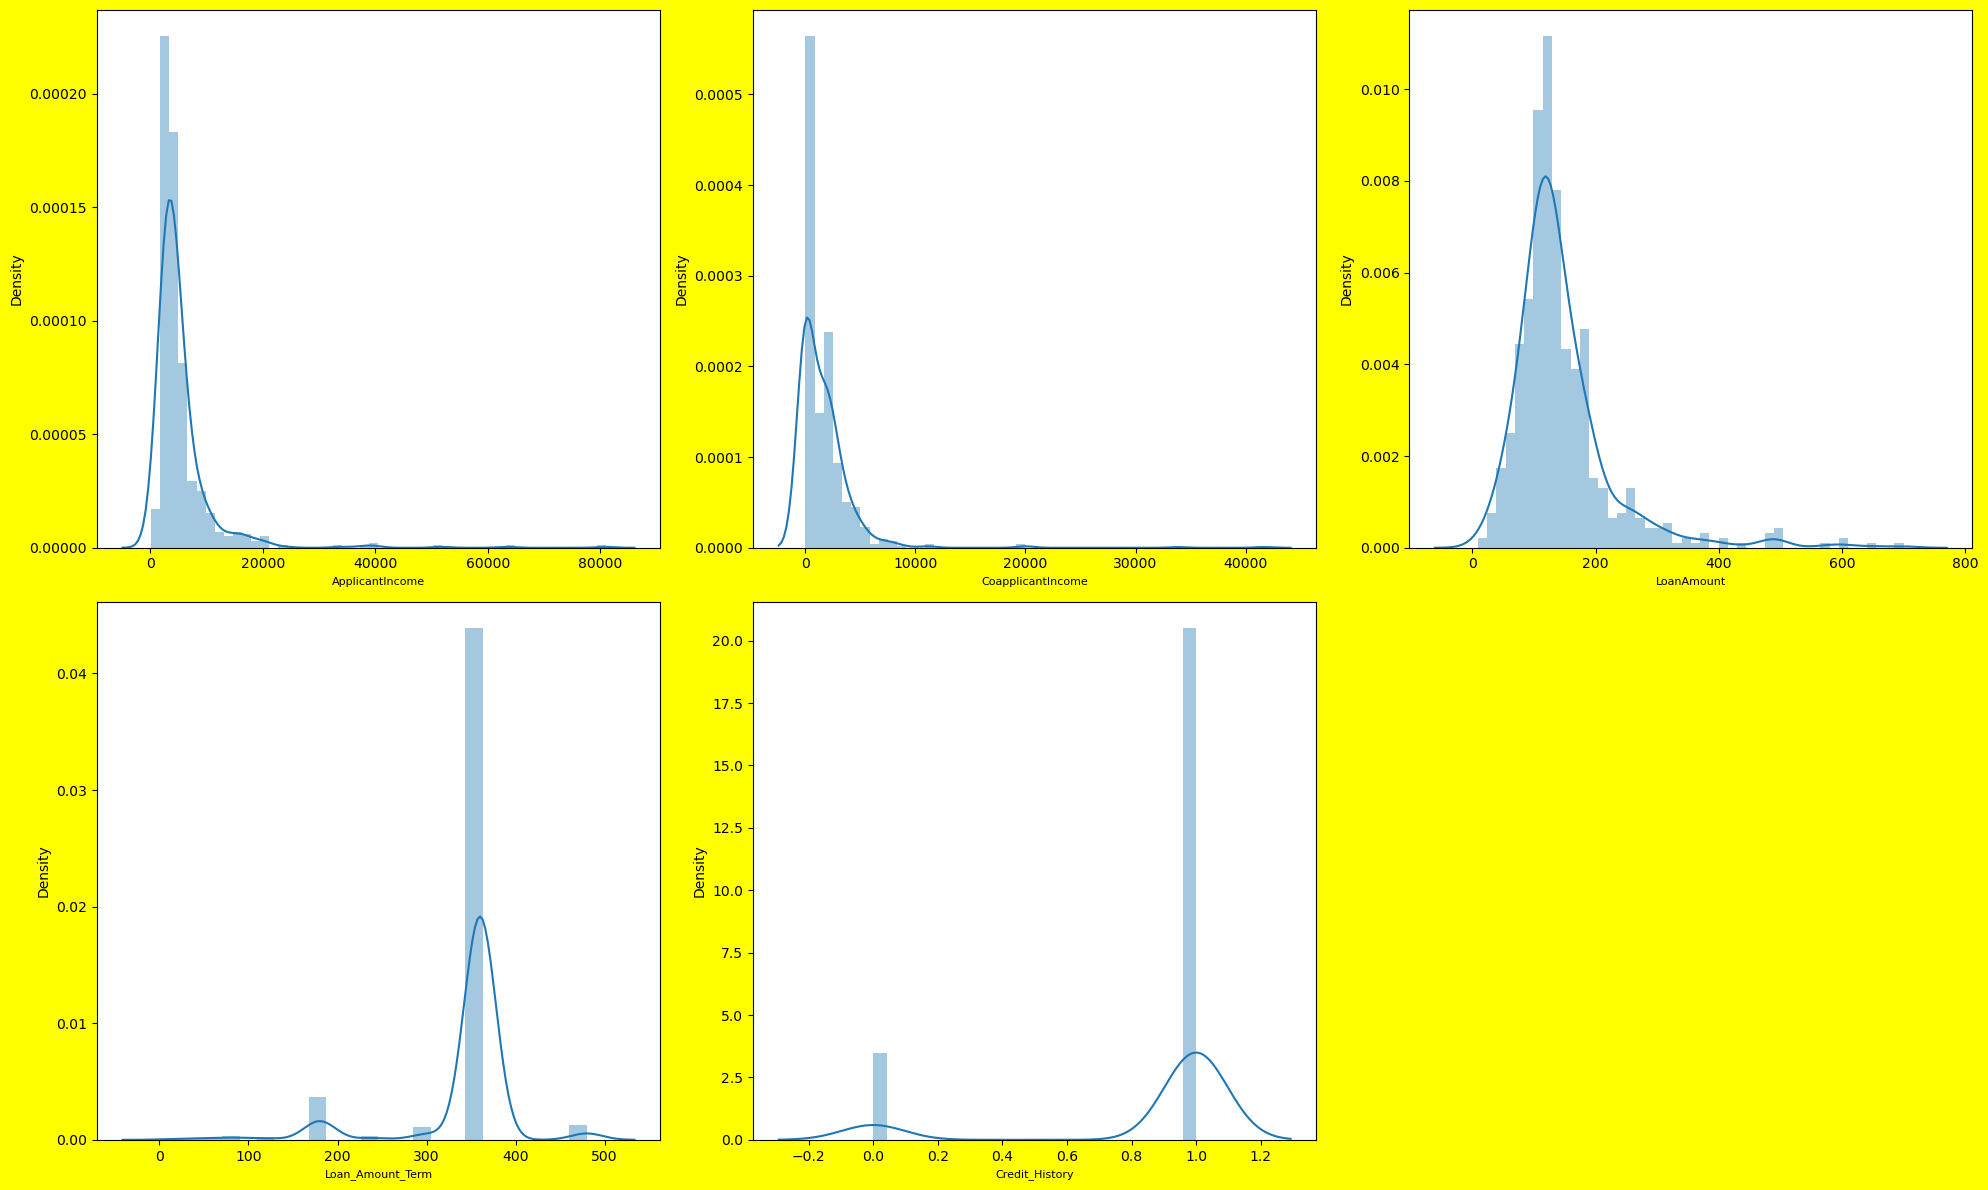

In [39]:
 #visulizing the distribution of nimerical columns
plt.figure(figsize=(20,12), facecolor= "yellow")
plotnumber = 1
for col in Numerical_col:
    if plotnumber<=5:
        ax=plt.subplot(2,3, plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=8)
        plt.yticks(rotation= 0, fontsize=10)
    plotnumber+=1
plt.tight_layout()

# ENCODING

In [42]:
#REPLACING THE CATEGORICAL VALUES WITH NUMERICAL VALUES IN TARGET VARIABLE
df['Loan_Status'] = df['Loan_Status'].replace(['N', 'Y'], [0, 1])

In [43]:
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]= OE.fit_transform(df[i].values.reshape(-1,1))
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,0.0,0.0,5849,0.0,120.0,360.0,1.0,2.0,1
1,1.0,1.0,1.0,0.0,0.0,4583,1508.0,128.0,360.0,1.0,0.0,0
2,1.0,1.0,0.0,0.0,1.0,3000,0.0,66.0,360.0,1.0,2.0,1
3,1.0,1.0,0.0,1.0,0.0,2583,2358.0,120.0,360.0,1.0,2.0,1
4,1.0,0.0,0.0,0.0,0.0,6000,0.0,141.0,360.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,2900,0.0,71.0,360.0,1.0,0.0,1
610,1.0,1.0,3.0,0.0,0.0,4106,0.0,40.0,180.0,1.0,0.0,1
611,1.0,1.0,1.0,0.0,0.0,8072,240.0,253.0,360.0,1.0,2.0,1
612,1.0,1.0,2.0,0.0,0.0,7583,0.0,187.0,360.0,1.0,2.0,1


There is askewness in most of the columns

In [44]:
#checking skewness
df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           1.015551
Education            1.367622
Self_Employed        2.159796
ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.745407
Loan_Amount_Term    -2.402112
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

In [45]:
# removing skewness of the data
from sklearn.preprocessing import PowerTransformer
PT=PowerTransformer()
for i in df.columns:
    if abs(df.loc[:,i].skew())>0.5:
        df.loc[:,i]=PT.fit_transform(df.loc[:,i].values.reshape(-1,1))

df.skew()

Gender              -1.648795
Married             -0.644850
Dependents           0.441404
Education            1.367622
Self_Employed        2.159796
ApplicantIncome     -0.092946
CoapplicantIncome   -0.145646
LoanAmount           0.018936
Loan_Amount_Term     0.392571
Credit_History      -2.021971
Property_Area       -0.066196
Loan_Status         -0.809998
dtype: float64

still there is skewness in most of the columns by using vif method we can drop some of columns

In [46]:
#check the corr
cor = df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.364569,0.162937,0.045364,-0.000525,0.087227,0.219590,0.141623,-0.080405,0.009170,-0.025752,0.017987
Married,0.364569,1.000000,0.355531,0.012304,0.004489,0.016968,0.312596,0.179049,-0.123179,0.010938,0.004257,0.091478
Dependents,0.162937,0.355531,1.000000,0.044038,0.079245,0.112222,0.014861,0.154522,-0.114250,-0.026755,0.032538,0.008400
Education,0.045364,0.012304,0.044038,1.000000,-0.010383,-0.178206,0.038406,-0.150344,-0.057505,-0.073658,-0.065243,-0.085884
Self_Employed,-0.000525,0.004489,0.079245,-0.010383,1.000000,0.185468,-0.089864,0.110823,-0.038754,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.087227,0.016968,0.112222,-0.178206,0.185468,1.000000,-0.367287,0.482562,-0.054431,0.012667,-0.029386,0.013568
CoapplicantIncome,0.219590,0.312596,0.014861,0.038406,-0.089864,-0.367287,1.000000,0.138243,0.004565,0.007486,-0.055421,0.056869
LoanAmount,0.141623,0.179049,0.154522,-0.150344,0.110823,0.482562,0.138243,1.000000,0.058976,-0.016510,-0.093935,-0.036606
Loan_Amount_Term,-0.080405,-0.123179,-0.114250,-0.057505,-0.038754,-0.054431,0.004565,0.058976,1.000000,-0.013188,-0.044168,-0.053574
Credit_History,0.009170,0.010938,-0.026755,-0.073658,-0.001550,0.012667,0.007486,-0.016510,-0.013188,1.000000,0.001963,0.540556


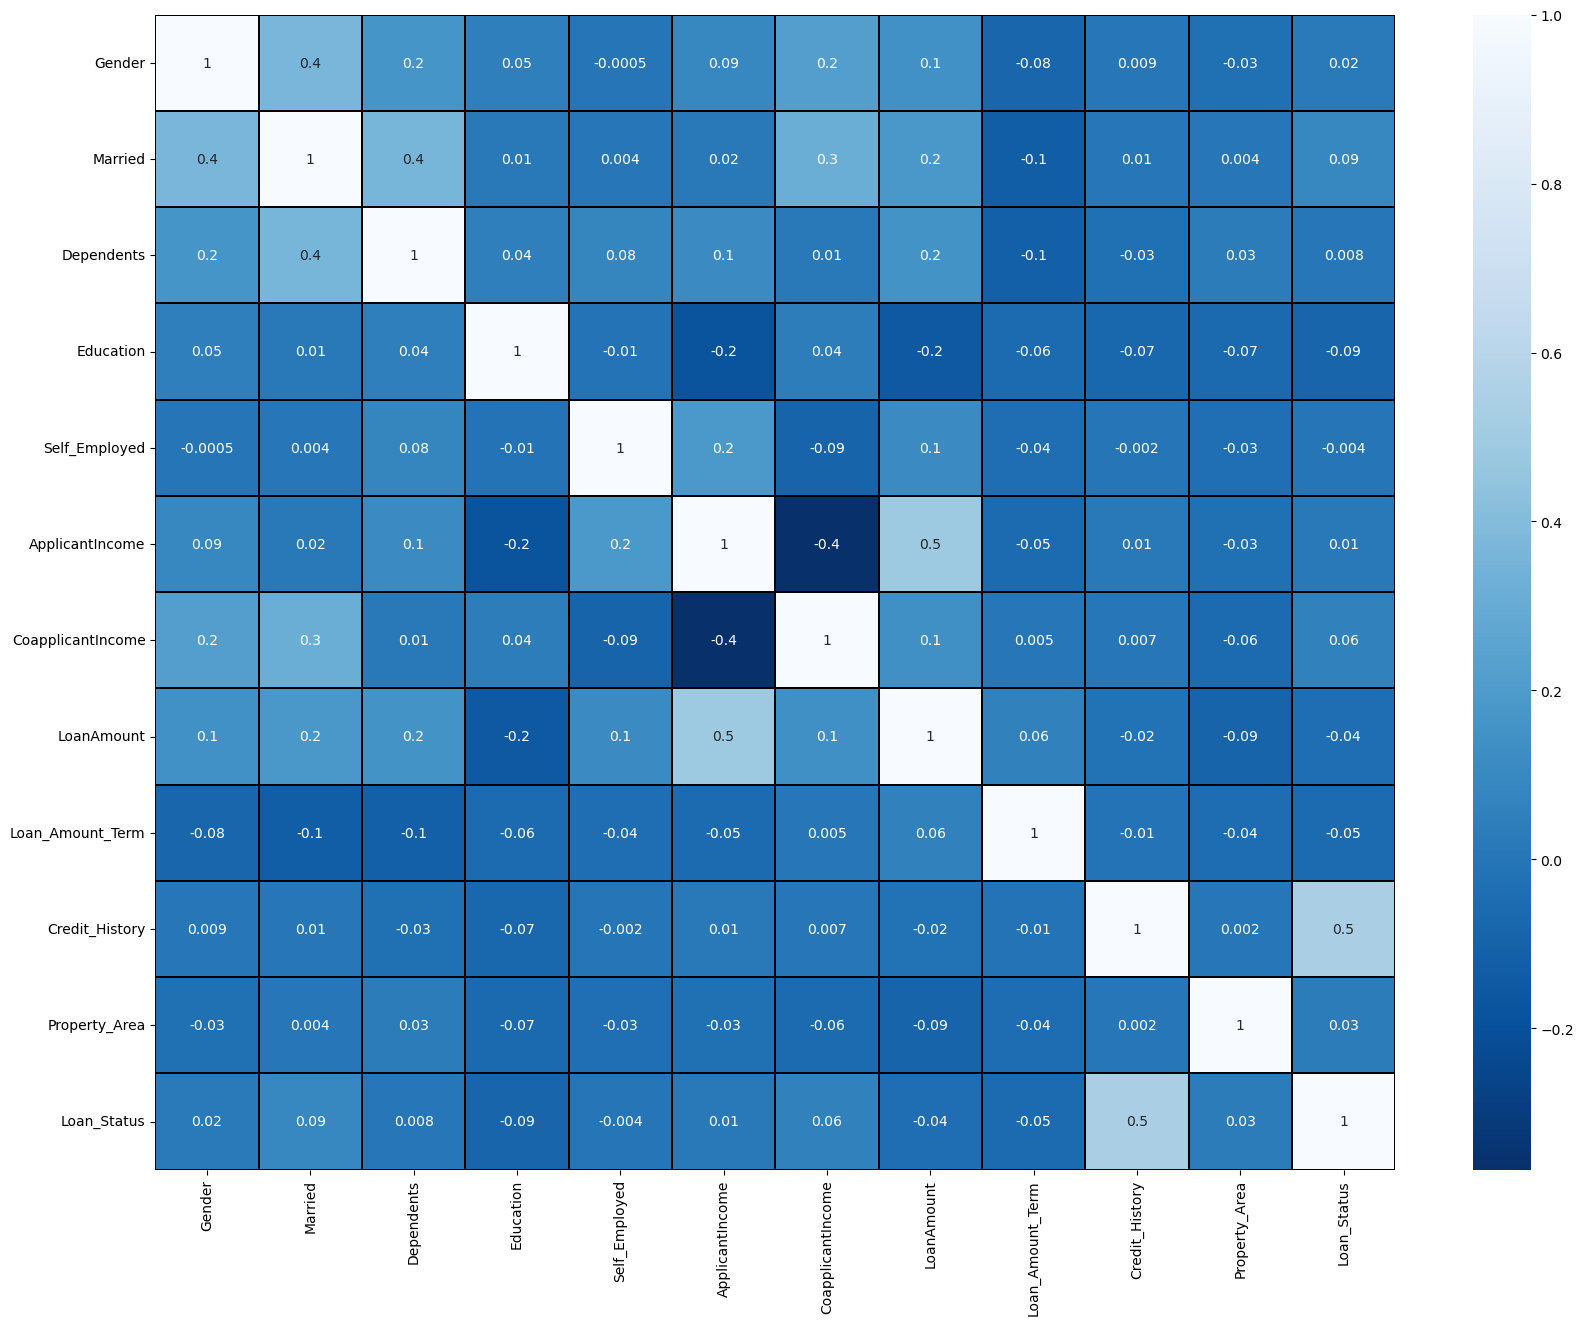

In [47]:
#by using heatmap checking the correlation matrix
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(), linewidths=0.1,fmt='.1g', linecolor="black", annot=True, cmap="Blues_r")
plt.show()

No features are not highly correlated with each other

# Seperating the label and features

In [48]:
x=df.drop('Loan_Status', axis=1)
y=df["Loan_Status"]

In [49]:
print(x.shape)
print(y.shape)

(614, 11)
(614,)


feature scaling using standardscaler

In [50]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)#

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.544331,-1.102837,-0.149985,0.175540,0.411733,1.223298
1,0.472343,0.728816,0.854259,-0.528362,-0.392601,0.170974,0.750578,-0.019602,0.175540,0.411733,-1.318513
2,0.472343,0.728816,-0.827104,-0.528362,2.547117,-0.499955,-1.102837,-1.335521,0.175540,0.411733,1.223298
3,0.472343,0.728816,-0.827104,1.892641,-0.392601,-0.743873,0.891686,-0.149985,0.175540,0.411733,1.223298
4,0.472343,-1.372089,-0.827104,-0.528362,-0.392601,0.582817,-1.102837,0.176671,0.175540,0.411733,1.223298
...,...,...,...,...,...,...,...,...,...,...,...
609,-2.117107,-1.372089,-0.827104,-0.528362,-0.392601,-0.554885,-1.102837,-1.192913,0.175540,0.411733,-1.318513
610,0.472343,0.728816,1.522278,-0.528362,-0.392601,-0.000290,-1.102837,-2.295908,-2.312879,0.411733,-1.318513
611,0.472343,0.728816,0.854259,-0.528362,-0.392601,1.023487,0.208603,1.384403,0.175540,0.411733,1.223298
612,0.472343,0.728816,1.316702,-0.528362,-0.392601,0.931750,-1.102837,0.755379,0.175540,0.411733,1.223298


In [51]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.204899,Gender
1,1.415178,Married
2,1.193221,Dependents
3,1.065289,Education
4,1.043765,Self_Employed
5,1.847357,ApplicantIncome
6,1.550576,CoapplicantIncome
7,1.598127,LoanAmount
8,1.047701,Loan_Amount_Term
9,1.008194,Credit_History


vif values are in range

# DATA MODELLING

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
import warnings 
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore')

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
maxAccu=0
maxRS=0
for i in range(1,100):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.30, random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train)
    pred=LR.predict(x_test)
    acc= accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS= i
print("Best accuracy is", maxAccu, "at random_state", maxRS)

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

In [67]:
models={
         "AdaBoostClassifier":AdaBoostClassifier(),
          "GradientBoostingClassifier":GradientBoostingClassifier(),"BaggingClassifier":BaggingClassifier(),
           "RandomForestClassifier":RandomForestClassifier(),
             "support vector mach":SVC(),"Decision tree classifier":DecisionTreeClassifier()
       }
                                
for i in range(len(list(models))):
       model= list(models.values())[i]
       model.fit(x_train,y_train)#train model
        
        # making predictions
       y_train_pred = model.predict(x_train)
       y_test_pred =model.predict(x_test)
        
        
        #Training set performance
       model_train_accuracy = accuracy_score(y_train,y_train_pred)
       model_train_f1    =   f1_score(y_train,y_train_pred)
       model_train_precision = precision_score(y_train,y_train_pred)
       model_train_recall =   recall_score(y_train,y_train_pred)
       model_train_roauc_score= roc_auc_score(y_train,y_train_pred)    
       #model_train_classification_report= classification_report(y_train,y_train_pred) 
                                        
                                        
          #Test set performance
       model_test_accuracy = accuracy_score(y_test,y_test_pred)
       model_test_f1    =   f1_score(y_test,y_test_pred)
       model_test_precision = precision_score(y_test,y_test_pred)
       model_test_recall =   recall_score(y_test,y_test_pred)
       model_test_roauc_score= roc_auc_score(y_test,y_test_pred)    
       #model_test_classification_report= classification_report(y_train,y_train_pred)   
                                        
                                        
                                        
       print(list(models.keys())[i]) 
                                        
                                        
       print("Model performance for Training set")
       print("-- Accuracy: {:.4f}".format(model_train_accuracy))       
       print("-- F1: {:.4f}".format(model_train_f1))                                 
       print("-- Precision: {:.4f}".format(model_train_precision))                                 
       print("-- Recalll: {:.4f}".format(model_train_recall))                                 
      
                                     
                                     
                                        
                                        
       print("Model performance for Test set")
       print("-- Accuracy: {:.4f}".format(model_test_accuracy))       
       print("-- F1: {:.4f}".format(model_test_f1))                                 
       print("-- Precision: {:.4f}".format(model_test_precision))                                 
       print("-- Recalll: {:.4f}".format(model_test_recall))                                 
       
                                        
       print('-'*30) 
       print("\n")   

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.